# Insight whiteboarding
# Oct. 24, 2017

1) The logistic map is a simple model often used in biology to describe the population of a species in an environment where there’s a competition between reproduction and starvation. It is a difference equation, that is that the state at time t, xt determines the state at the next time t+1, xt+1. It reads as
x_t+1 = r*x_t*(1-x_t)
where x and r are both real numbers satisfying  0≤x_t≤1 and 0<r<4. The state of the system at any time t, xt is determined only by the initial condition x0 and the model parameter r†. 
You are the CFO of a company and want to use the logistic map to study its well-doing in its market ecosystem. With variable x representing the fraction of the market that your company has and r determining the growth/starvation conditions of your company, how you go about writing a function/program? Sketch the code/pseudocode on the whiteboard.


2) Craps is a dice-rolling casino game where each roll, depending on your bets, can be a winning roll (w>0), a losing roll (w<0), or a neutral roll (w=0). You’ve loaded the outcome of all your rolls in an array to analyze your behavior after a craps session. Write a function that, from all your rolls with winnings (w1, w2, …, wN), finds the sequence of rolls that gives the largest winnings.

### 1) Code for logistic map. Play around with the parameter r and look at the solutions. They're really cool!

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class logistic_map:
    def __init__(self, initial_x, parameter_r):
        self.x0 = initial_x
        self.r  = parameter_r
        self.t = 0
        self.x = [self.x0]
        
    def evolve(self, nsteps):
        # Advance state
        for t in range(nsteps):
            self.x.append(self.r*self.x[t]*(1-self.x[t]))
        # Shift t to current
        self.t += nsteps

In [37]:
# Logistic map parameters
x0 = 0.20    # Initial state
r  = 3.50    # rate parameter

# Initialize instance of class logistic_map
lm=logistic_map(x0, r)

# Evolve in time
Nsteps=100
lm.evolve(Nsteps)


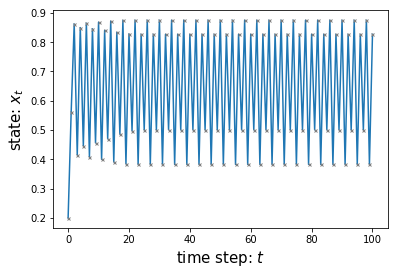

In [38]:
# Plot state of the system as a function of time
fs = 15
plt.plot(range(Nsteps+1), lm.x, '-')
plt.plot(range(Nsteps+1), lm.x, 'x', markersize=3, color='grey')
plt.xlabel('time step: $t$', fontsize=fs)
plt.ylabel('state: $x_t$' , fontsize=fs)

### 2) The code for question reduces to finding the contiguous subarray of (w1, ..., wN) that has a maximum sum. Here's my solution using dynamic programming

In [2]:
def contig_subarr_maxsum(A):
    '''
    Finds the contiguous subarray of A with max subarray sum.
    '''
    # Length of array
    N = len(A)
    # Max sum one position to the left of current position
    ML = A[0]
    # Value of the maximum subarray sum 
    maxsum = A[0]
    # Indices of left and right edges of maximum sum subarray
    iL, iR = 0,1
    
    # Loop over array and compute max sums.
    # M is the max sum at the current position
    for i in range(1,N):    
        if (ML + A[i] > A[i]):  # Current value adds positively to sum
            M = ML + A[i]
            if (M >= ML):
                maxsum = M
                iR += 1
        elif(A[i] >= ML):       # Curr. val. doesn't add pos. to sum but is larger than sum
            M = A[i]
            maxsum = A[i]
            iL = i
            iR = i + 1
        else: #same as A[i]<ML  # Curr. val. doesnt' add pos. to sum but is smaller than sum
            M = A[i]
        ML = M
    return maxsum, (iL,iR)

In [3]:
A=[1,2,1,0,-5,3,1,1,-1]        # should return 5,(5,8)
print contig_subarr_maxsum(A)
B=[-1, -2, -3, -4, -5]         # should return -1,(0,1)
print contig_subarr_maxsum(B)
C=[0, 1, -1, 1, -1, 1]         # should return 1,(5,6) 
print contig_subarr_maxsum(C)
D=[0,1,-2,3,-4,5,-6,7]         # should return 7,(7,8)
print contig_subarr_maxsum(D)
E=[0,1,-2,-2, 3,-4,5,-6,7]     # should return 7,(8,9)
print contig_subarr_maxsum(E)

(5, (5, 8))
(-1, (0, 1))
(1, (5, 6))
(7, (7, 8))
(7, (8, 9))
